# 利用pandas进行绘图

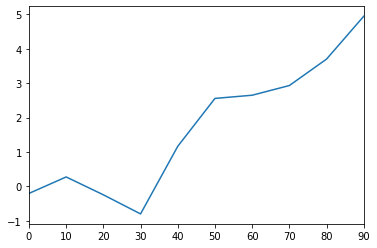

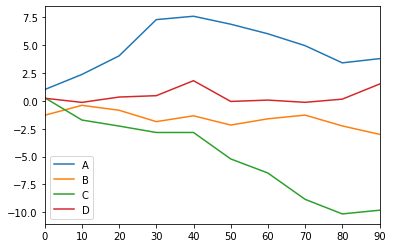

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
from pandas import Series, DataFrame
import pandas as pd
%matplotlib inline
#线图 CUM
plt.close('all')

s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

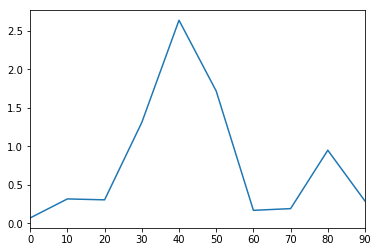

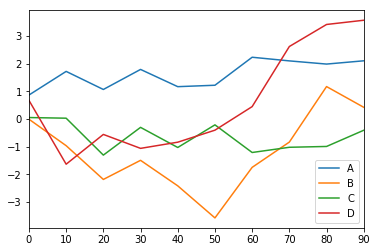

In [9]:
#线图 
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()


Genus,A,B,C,D
one,0.364490,0.156039,0.177304,0.867890
two,0.290095,0.585180,0.453995,0.411178
three,0.882634,0.692708,0.279273,0.064440
four,0.198624,0.931683,0.854414,0.954735
five,0.052253,0.579472,0.480496,0.021709
six,0.373620,0.414092,0.603907,0.671749


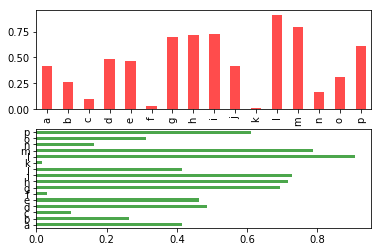

In [10]:
#柱形图
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='r', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='g', alpha=0.7)

df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df


size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3
size   3   4  5
day            
Fri    1   1  0
Sat   18  13  1
Sun   15  18  3
Thur   4   5  1


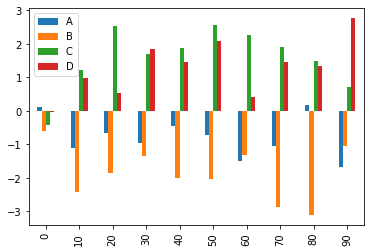

<Figure size 432x288 with 0 Axes>

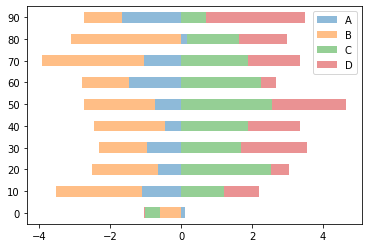

In [18]:
df.plot(kind='bar') #图例

plt.figure()

df.plot(kind='barh', stacked=True, alpha=0.5)

tips = pd.read_csv('data/tips.csv') # 各数据点的百分比
party_counts = pd.crosstab(tips.day, tips['size'])  #size聚会人数
print(party_counts)

party_counts = party_counts.iloc[:, 2:5] # 选取一部分数据
print(party_counts)


size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241


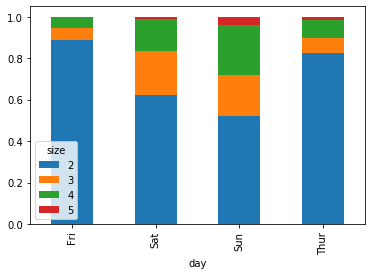

In [3]:

party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0) # 转换成百分比, 1 代表维度 行的方向
party_pcts
print(party_pcts)
party_pcts.plot(kind='bar', stacked=True)   #每天的高度都是1

# pandas 联合使用pyplot 课堂代码 

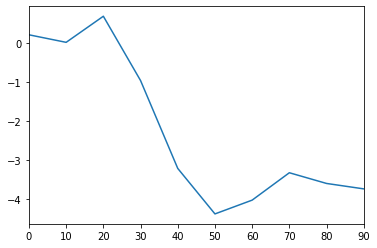

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()
plt.show()


pandas的大部分绘图方法都有一个可选的ax参数，它可以是一个matplotlib的subplot对象。这是你能够在网络布局中更为灵活地处理subplot的位置。DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例

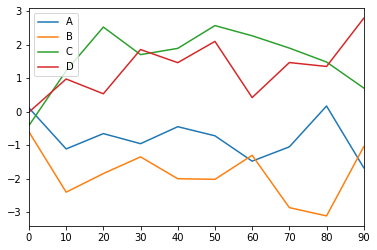

In [12]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=list('ABCD'), index=np.arange(0, 100, 10))
df.plot()
plt.show()

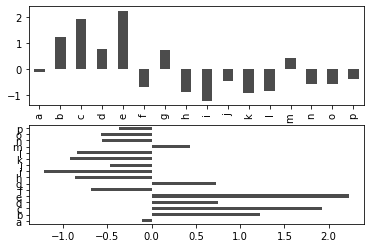

In [13]:
#课堂讲解柱形图
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)
plt.show()


<Figure size 432x288 with 0 Axes>

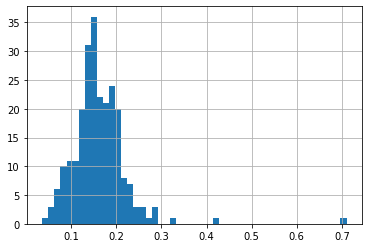

<Figure size 432x288 with 0 Axes>

In [14]:
#直方图 课堂讲解  利用 tips 数据 。给小费占总费用的比例的分布图
plt.figure()

tips['tip_pct'] = tips['tip'] / tips['total_bill']  #增加一个新的列
tips['tip_pct'].hist(bins=50) # 分为50个区间 

plt.figure()


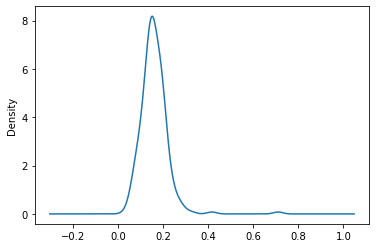

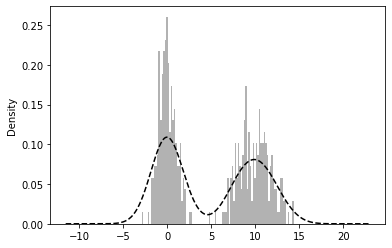

In [16]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html
#In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.
tips['tip_pct'].plot(kind='kde')  # Generate Kernel Density Estimate plot using Gaussian kernels.

plt.figure()

comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)  模拟出 0，1 的正态分布数据 0，期望值， 1 方差值
comp2 = np.random.normal(10, 2, size=200)  # 10，期望值， 2 方差值  方差值大，跨度就大些
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', density=True)
values.plot(kind='kde', style='k--')

In [19]:
#散点图  研究两个变量的关系，是否有线性或曲线相关性。
macro = pd.read_csv("data/macrodata.csv")
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]
print(trans_data[-5:])
plt.figure()


          cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024104DD2B88>,
      dtype=object)

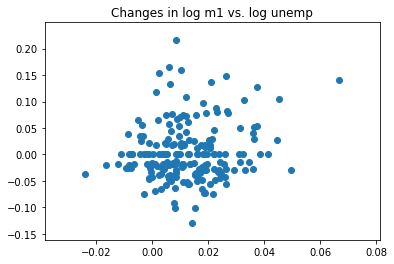

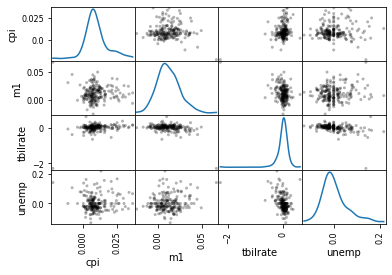

In [20]:

plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024104E3AAC8>,
      dtype=object)

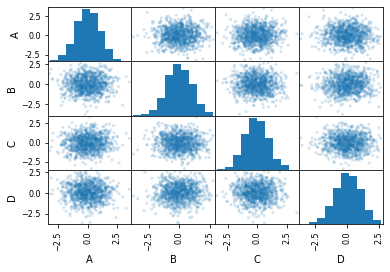

In [21]:
#散点图例子
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2)

In [21]:
# 课堂讲解pandas matplotlib 两者关系
df=pd.DataFrame(np.random.randn(3,4),index=list('123'),columns=list('ABCD'))
df


,A,B,C,D
1,1.590148,-0.820410,-0.971580,-0.396866
2,2.142111,0.310033,0.036315,0.246231
3,-0.374823,0.342436,1.342257,0.054856


In [22]:
df2=pd.DataFrame(np.random.randn(4,4),index=list('1234'),columns=list('ABCD'))
df2

,A,B,C,D
1,1.595696,-1.163182,-1.271716,0.653339
2,-1.101361,-0.014156,0.866822,1.854922
3,-1.103724,0.390913,-1.055906,0.005182
4,1.655279,-1.474708,-1.896673,0.668397


Text(0.5,1,'4points')

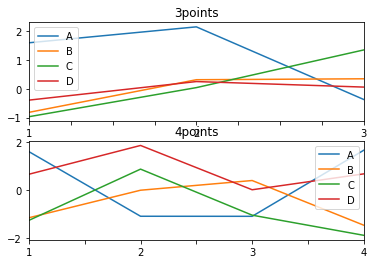

In [23]:
fig, axes = plt.subplots(2, 1)
df.plot(ax=axes[0])
df2.plot(ax=axes[1])
axes[0].set_title('3points')
axes[1].set_title('4points')

In [26]:
idx = pd.Index(list('abc'))
idx.get_level_values(1)


Index(['a', 'b', 'c'], dtype='object')